# Predicting Diabetes Onset Using Machine Learning: A Comparative Analysis of Logistic Regression, Decision Tree, and Random Forest Models

## Team Members
- **Member 1: Bhuvan Patle**
- **Member 2: Vishal Bende**

## Introduction
This project aims to develop a machine learning model that can predict diabetes based on diagnostic measures. We use various classification algorithms and evaluate their performances to determine the most effective model.

Diabetes is a chronic health condition that affects millions of individuals globally and poses significant health risks if not diagnosed and managed early. Early prediction of diabetes can enable timely interventions and help individuals adopt preventive measures, thereby reducing long-term complications associated with the disease. This project aims to predict the onset of diabetes using the Pima Indians Diabetes Database, a widely studied dataset available on Kaggle. The dataset includes various health indicators such as glucose level, blood pressure, and body mass index, which are known to be correlated with diabetes risk.

In this study, we implement and compare the performance of three machine learning algorithms: Logistic Regression, Decision Tree, and Random Forest. We will follow a comprehensive machine learning pipeline, including data cleaning, exploratory data analysis (EDA), feature engineering, model training, evaluation, and interpretation of results. By analyzing these models, we aim to identify an optimal predictive approach for diabetes risk classification, providing insights into both the effectiveness of each model and the significance of various health indicators in predicting diabetes onset.

This comparative approach will help us assess each algorithm's predictive power and reliability, identifying strengths and potential areas for improvement in diabetes prediction models.



DataSet we are using: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Models we are going to use: ***Logistic Regression, Decision tree Algorithm and Random Forest***

## Step 1: Setup and Load the Dataset
We will begin by importing necessary libraries and loading the Titanic dataset.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Step 2: Data Cleaning and Formatting
Inspect the Dataset
We will check the dataset for missing values and data types.


Code for inspecting the dataset
Handle Missing Values
We will address missing data by dropping or imputing values as necessary.


Code for handling missing values
Convert Categorical Variables
Categorical variables will be converted to numerical representations.


 Code for converting categorical variables

In [8]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check data types and statistics
print("Data Types:\n", df.dtypes)
print("Statistical Overview:\n", df.describe())


Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Statistical Overview:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0

# Step 3: Exploratory Data Analysis (EDA)
Visualize the Data
We will create visualizations to better understand the relationships in the data.



 Code for visualizing data
Correlation Matrix
A correlation matrix will help us identify relationships between features.



 Code for creating a correlation matrix


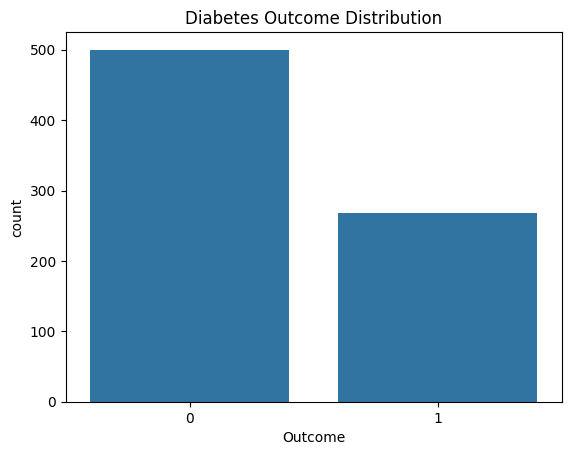

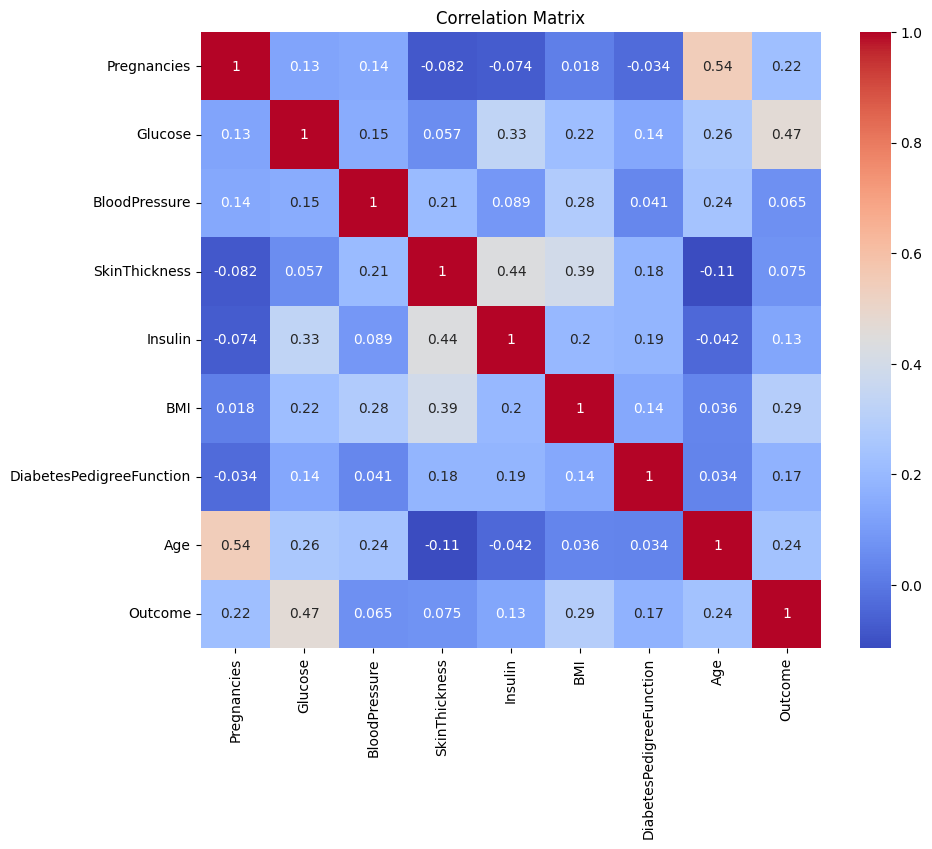

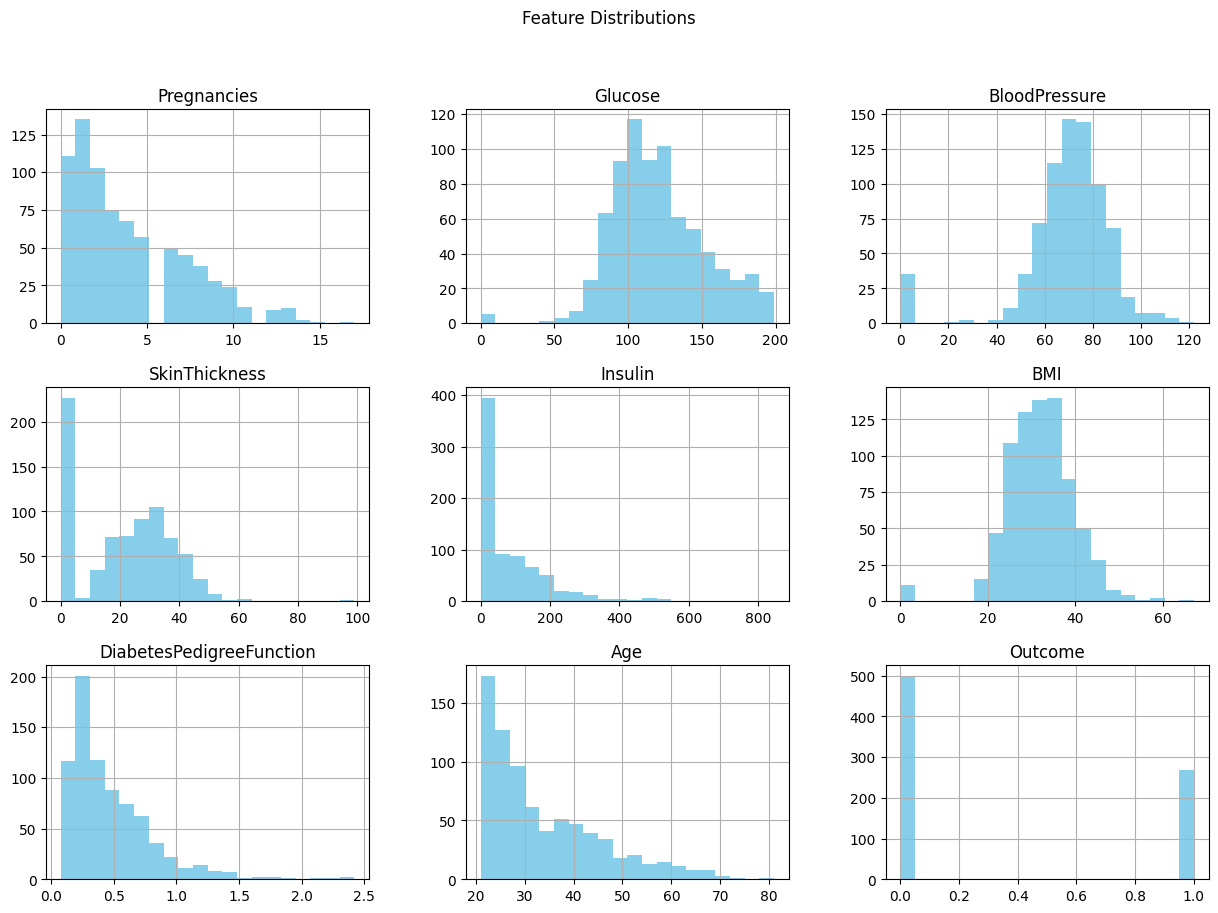

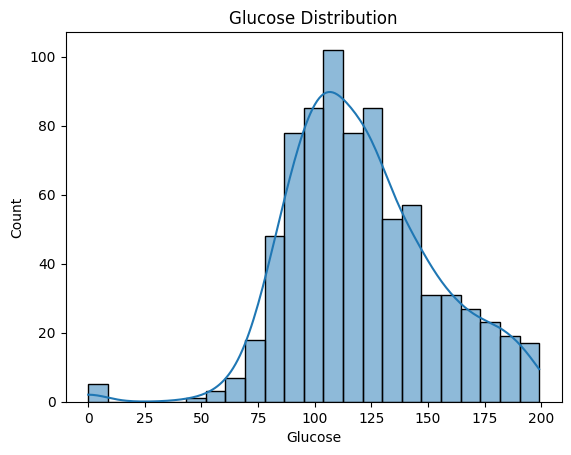

In [9]:
# Target distribution
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of key features
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

# Visualize distributions of key features
sns.histplot(df['Glucose'], kde=True)
plt.title('Glucose Distribution')
plt.show()


# Step 4: Feature Engineering and Selection
Select Features and Target
We will define our feature set (X) and target variable (y).


 Code for selecting features and target variable
Train-Test Split
We will split the dataset into training and testing sets.


 Code for train-test split


In [10]:
# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 5: Train and Test the Model with Cross-Validation
We will create a baseline model and evaluate its performance using cross-validation.

 Code for training and evaluating baseline model


In [11]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression - Cross-Validation Accuracy: 0.7606 ± 0.0299
Decision Tree - Cross-Validation Accuracy: 0.7312 ± 0.0317
Random Forest - Cross-Validation Accuracy: 0.7736 ± 0.0220


# Step 6: Compare Multiple Models
Model Comparison
We will train multiple models and compare their performance.
### Here it is Random Forest

# Step 7: Hyperparameter Tuning
We will optimize the best-performing model using grid search for hyperparameter tuning.




In [19]:
# Hyperparameter tuning for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Randomized search
random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.8f}".format(random_search.best_score_))


Best parameters found:  {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 30}
Best cross-validation accuracy: 0.78505931


# Step 8: Evaluate the Best Model
We will evaluate the best model's performance on the testing set.


 Code for model evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



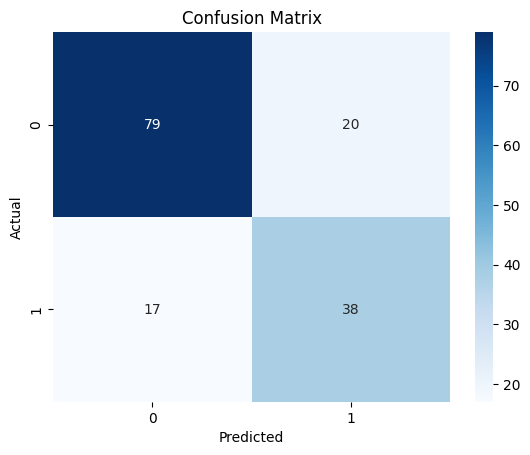

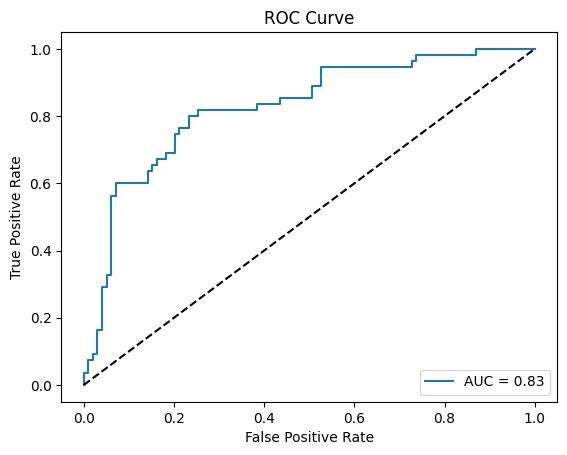

Accuracy: 0.7597402597402597


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (for binary classification)
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


# Step 9: Interpret the Model Results
Feature Importance
We will analyze the importance of each feature in the best model.


 Code for visualizing feature importance

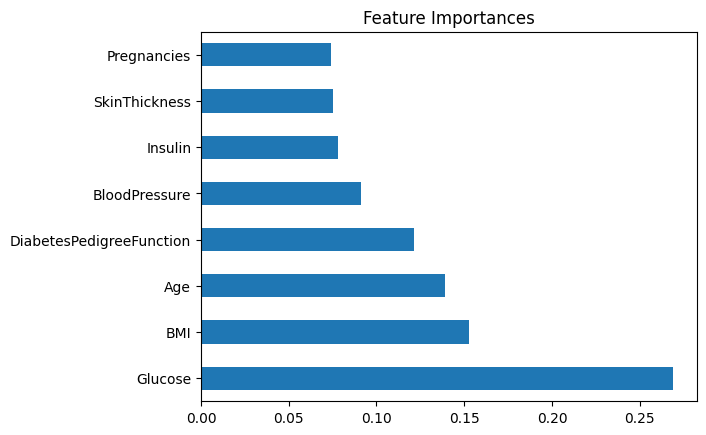

In [ ]:
# Feature importance for Random Forest
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
feature_importances.nlargest(8).plot(kind='barh')
plt.title('Feature Importances')
plt.show()
